# Signal decomposition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
from scipy import (
    signal
)
from scipy.fft import (
    fft, 
    fftfreq,
    rfft, 
    rfftfreq
)
from scipy.stats import uniform
import torch

from IPython.display import (
    Audio, 
    display
)

In [2]:
# SAMPLING_RATE = 44100              # Hertz
SAMPLING_RATE = 16000              # Hertz
SAMPLE_BIT_DEPTH: int = 16         # 16 bit sample bit depth
MAX_SIGNED_INT16: np.int16 = np.iinfo(np.int16).max
SAMPLE_MAX_AMPLITUDE: int = MAX_SIGNED_INT16

DURATION = 1  # Seconds
N_SAMPLES: int = SAMPLING_RATE * DURATION

In [3]:
def quantize(y):
    quantized = np.int16(y * SAMPLE_MAX_AMPLITUDE / y.max()) 
    return quantized

# Delta Function

Delta function includes all the frequencies.

In [20]:
def delta(
    sampling_rate: int = SAMPLING_RATE,
    duration: float = DURATION
):
    """
    Args:
        sampling_rate: how many samples to take per second
        duration: total length of sampling in seconds.

    Returns (x, y)
    """
    num_samples: int = sampling_rate * duration
    x = np.linspace(
        start=0, 
        stop=duration, 
        num=num_samples, 
        endpoint=False    # DO NOT include stop as a sample point (need exactly SAMPLING_RATE points / sec)
    ).astype(np.float64)
    y = signal.unit_impulse(shape=num_samples, idx=0, dtype=np.float64)

    return x, y

### Quantize to 16 bit signed

In [21]:
x, y = delta()
quantized = quantize(y)

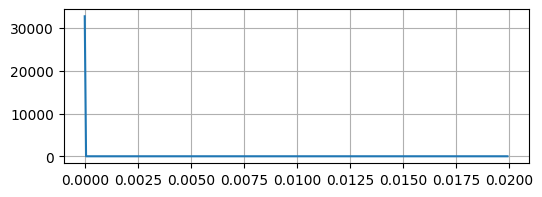

In [22]:
num_samples: int = int(len(x) / 50)  # .1 second

plt.figure(figsize=(6, 2))
plt.grid()
plt.plot(x[:num_samples], quantized[:num_samples])

### FFT of Delta Function

FFT of the ```Delta function``` is a ```Unit function``` that includes all the frequencies.

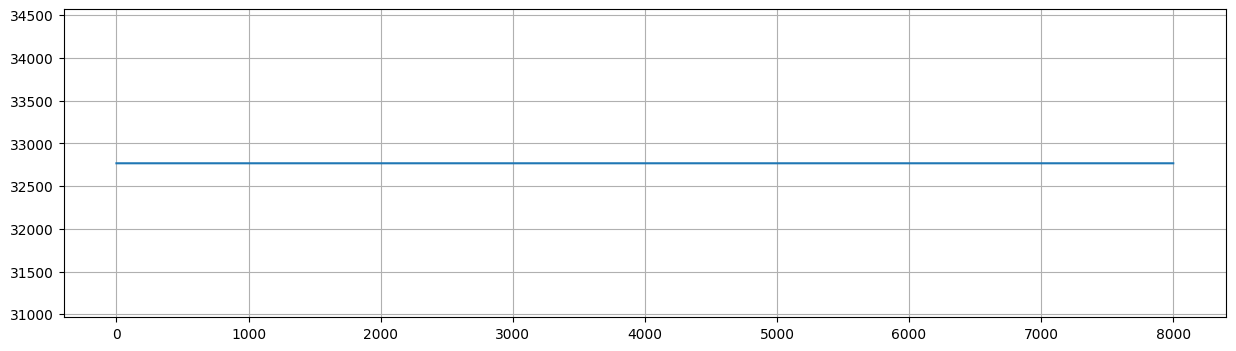

In [23]:
yf = np.abs(rfft(quantized))
xf = rfftfreq(
    n=len(quantized),             # window length
    d=(1 / SAMPLING_RATE)    # delta(t) = sample spacing.
)

plt.figure(figsize=(15, 4))
plt.grid()
plt.plot(xf, yf)
plt.ticklabel_format(scilimits=(-99, 99))
plt.show()

---
# Unit Function

FFT of a ```Unit function``` is ```Delta function```. There is a inverse type relation between ```Delta``` and ```Unit``` functions. 

In [24]:
def unit(
    sampling_rate: int = SAMPLING_RATE,
    duration: float = DURATION
):
    """
    Args:
        sampling_rate: how many samples to take per second
        duration: total length of sampling in seconds.

    Returns (x, y)
    """
    num_samples: int = sampling_rate * duration
    x = np.linspace(
        start=0, 
        stop=duration, 
        num=num_samples, 
        endpoint=False    # DO NOT include stop as a sample point (need exactly SAMPLING_RATE points / sec)
    ).astype(np.float64)
    y = np.array([1.0] * num_samples).astype(np.float64)
    return x, y

In [25]:
x, y = unit()
quantized = quantize(y)

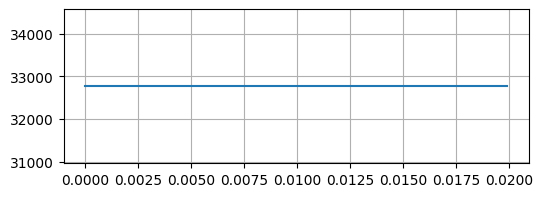

In [26]:
num_samples: int = int(len(x) / 50)  # .1 second

plt.figure(figsize=(6, 2))
plt.grid()
plt.plot(x[:num_samples], quantized[:num_samples])

## FFT of Unit Function

FFT of the ```Unit function``` is ```Delta function``` that only inlcudse frequency zero.

Fourier Coefficients ```F[k]``` of the ```Unit function``` is   :
$$
\begin{align}
& F[k] = \sum_{n=0}^{N-1} e^{-j \frac{2\pi}{N}nk} = N \delta [k] \\
& e^{-j \frac{2\pi}{N}nk} = 1 \text {   (n=0)}
\end{align}
$$



* k: Index of the basis vector in the complex Fourier space.
* N: Number of samples
* n: Index of a sample

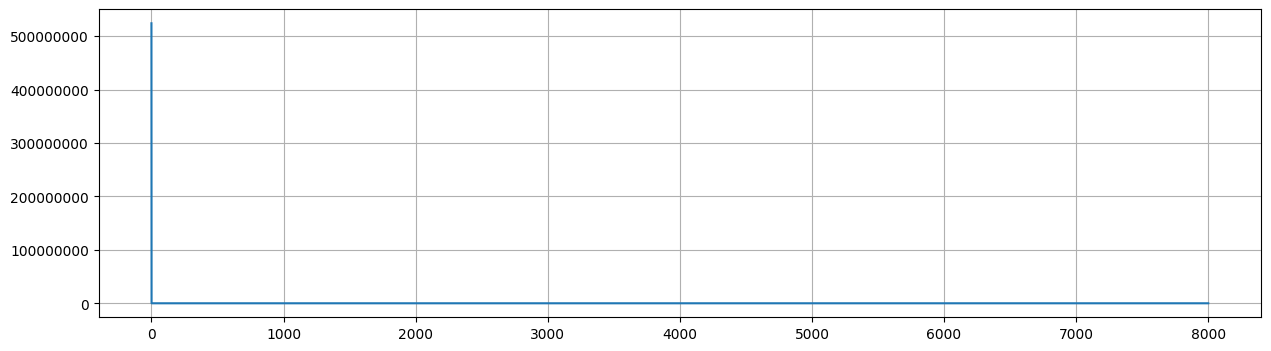

In [27]:
yf = np.abs(rfft(quantized))
xf = rfftfreq(
    n=len(quantized),             # window length
    d=(1 / SAMPLING_RATE)    # delta(t) = sample spacing.
)

plt.figure(figsize=(15, 4))
plt.grid()
plt.plot(xf, yf)
plt.ticklabel_format(scilimits=(-99, 99))
plt.show()

In [28]:
def linear(
    sampling_rate: int = SAMPLING_RATE,
    duration: float = DURATION
):
    """
    Args:
        sampling_rate: how many samples to take per second
        duration: total length of sampling in seconds.

    Returns (x, y)
    """
    num_samples: int = sampling_rate * duration
    x = np.linspace(
        start=0, 
        stop=duration, 
        num=num_samples, 
        endpoint=False    # DO NOT include stop as a sample point (need exactly SAMPLING_RATE points / sec)
    ).astype(np.float64)
    y = x
    return x, y

In [29]:
x, y = linear()
quantized = quantize(y)

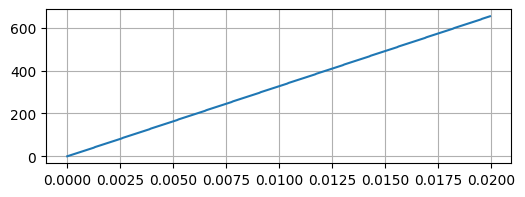

In [30]:
num_samples: int = int(len(x) / 50)  # .1 second

plt.figure(figsize=(6, 2))
plt.grid()
plt.plot(x[:num_samples], quantized[:num_samples])

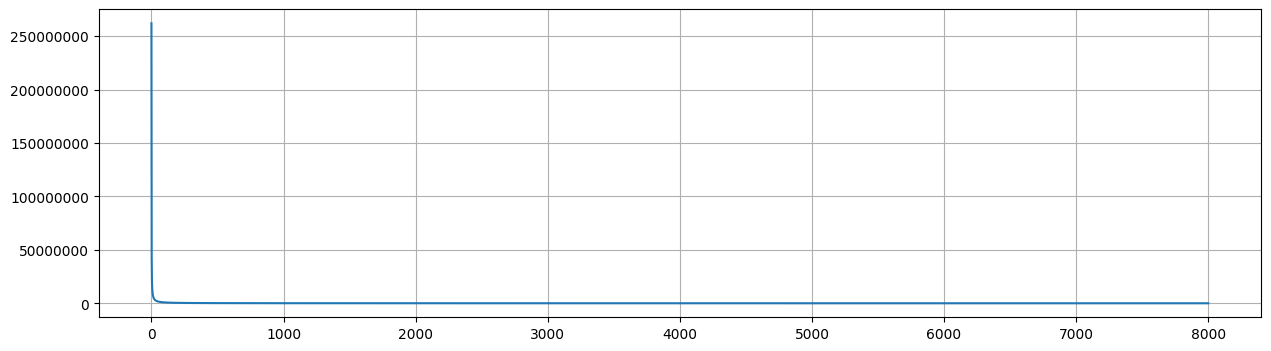

In [31]:
yf = np.abs(rfft(quantized))
xf = rfftfreq(
    n=N_SAMPLES,             # window length
    d=(1 / SAMPLING_RATE)    # delta(t) = sample spacing.
)

plt.figure(figsize=(15, 4))
plt.grid()
plt.plot(xf, yf)
plt.ticklabel_format(scilimits=(-99, 99))
plt.show()